# Analysis of Financial Documents to Forecast Stock Prices

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import seaborn as sns
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stock_predictions = pd.read_csv('/content/NEWS_YAHOO_stock_prediction.csv')
stock_predictions.head()

,Unnamed: 0,ticker,Date,category,title,content,Open,High,Low,Close,Adj Close,Volume,label
0,0,AAPL,2020-01-27,opinion,Apple Set To Beat Q1 Earnings Estimates Tech ...,Technology giant Apple NASDAQ AAPL is set ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
1,1,AAPL,2020-01-27,opinion,Tech Daily Intel Results Netflix Surge Appl...,The top stories in this digest are Intel s N...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
2,2,AAPL,2020-01-27,opinion,7 Monster Stock Market Predictions For The Wee...,S P 500 SPY \nThis week will be packed with e...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
3,3,AAPL,2020-01-27,opinion,Apple Earnings Preview 5G Launch Expanding S...,Reports Q1 2020 results on Tuesday Jan 28 ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
4,4,AAPL,2020-01-27,opinion,Buy Surging Apple Microsoft Stock Before Qua...,On today s episode of Full Court Finance here ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0


In [ ]:
stock_predictions = stock_predictions[:5000]
stock_predictions.shape

(5000, 15)

In [ ]:
stock_predictions['length'] = list(map(lambda x: len(str(x).split(' ')),stock_predictions['content']))
stock_predictions.head()

,Unnamed: 0,ticker,Date,category,title,content,Open,High,Low,Close,Adj Close,Volume,label,len,length
0,0,AAPL,2020-01-27,opinion,Apple Set To Beat Q1 Earnings Estimates Tech ...,Technology giant Apple NASDAQ AAPL is set ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0,710,710
1,1,AAPL,2020-01-27,opinion,Tech Daily Intel Results Netflix Surge Appl...,The top stories in this digest are Intel s N...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0,2099,2099
2,2,AAPL,2020-01-27,opinion,7 Monster Stock Market Predictions For The Wee...,S P 500 SPY \nThis week will be packed with e...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0,509,509
3,3,AAPL,2020-01-27,opinion,Apple Earnings Preview 5G Launch Expanding S...,Reports Q1 2020 results on Tuesday Jan 28 ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0,650,650
4,4,AAPL,2020-01-27,opinion,Buy Surging Apple Microsoft Stock Before Qua...,On today s episode of Full Court Finance here ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0,362,362


In [ ]:
print(stock_predictions['label'].corr(stock_predictions['length']))

-0.012936539304544269


<Axes: xlabel='category', ylabel='count'>

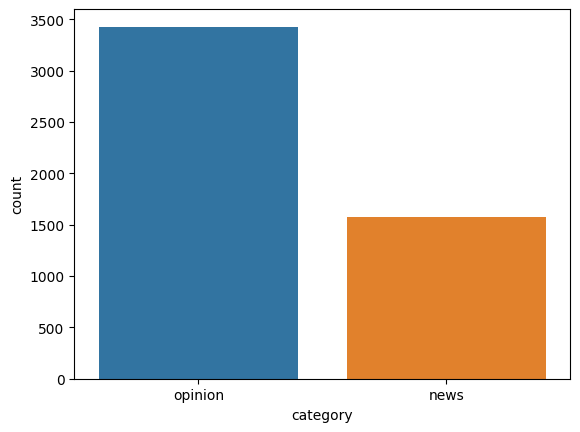

In [ ]:
sns.countplot(x='category', data=stock_predictions)

In [ ]:
!pip install text_hammer
import text_hammer as th
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
content = stock_predictions['content'].copy()[:]
content = content.to_list()
content = list(map(lambda x: x.lower(), content))
#content = list(map(lambda x: th.cont_exp(x), content))
content = list(map(lambda x: th.remove_emails(x), content))
content = list(map(lambda x: th.remove_emails(x), content))
content = list(map(lambda x: th.remove_html_tags(x),content))
content = list(map(lambda x: th.remove_stopwords(x), content))
content = list(map(lambda x: th.remove_special_chars(x), content))
content = list(map(lambda x: th.remove_accented_chars(x), content))
#content = list(map(lambda x: th.make_base(x), content))

In [ ]:
content[:1]

['technology giant apple nasdaq aapl set release quarter fiscal 2020 results jan 28 market close apple accounts 19 total market capitalization entire technology sector s p 500 index worth taking look fundamentals ahead quarterly results apple hitting record highs lately returned 28 past months par industry s gain momentum expected continue company beats estimates soon reported quarter read inside methodologyapple zacks rank 2 buy 4 08 according methodology combination positive earnings esp zacks rank 1 strong buy 2 buy 3 hold increases chances earnings beat uncover best stocks buy sell reported apple saw positive earnings estimate revision couple cents past 30 days fiscal quarter analysts raising estimates right earnings date information possible pretty good indicator stock additionally company strong track record positive earnings surprise delivered average positive earnings surprise 3 64 trailing quarters zacks consensus estimate indicates modest year year increase 8 37 earnings 4 07

In [ ]:
pairs = []
for doc in tqdm(content):
  pairs.extend(nltk.word_tokenize(doc))
freq = nltk.FreqDist(pairs)
freq.most_common(10)

  0%|          | 0/5000 [00:00<?, ?it/s]

[('s', 45038),
 ('year', 20504),
 ('1', 17975),
 ('zacks', 16417),
 ('company', 15933),
 ('nasdaq', 13406),
 ('apple', 13389),
 ('earnings', 12955),
 ('2', 12104),
 ('3', 11472)]

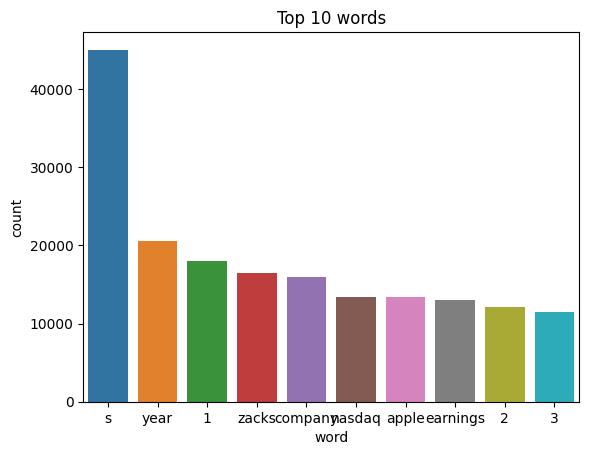

In [ ]:
words_df = pd.DataFrame(freq.most_common(10),  columns=['word', 'count'])
sns.barplot(x='word',y='count',data= words_df)
plt.title("Top 10 words")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
#from keras.utils.all_utils import to_categorical
from keras.utils import to_categorical
Y = to_categorical(stock_predictions['label'])
X = content.copy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)

In [ ]:
from keras.preprocessing.text import Tokenizer
num_words = 40000
tokenizer = Tokenizer(num_words, lower=True)
df_total = pd.concat([pd.Series(X_train), pd.Series(X_test)], axis=0)
tokenizer.fit_on_texts(df_total)

In [ ]:
from keras.utils import pad_sequences

X_train_ =tokenizer.texts_to_sequences(X_train)
X_train_pad=pad_sequences(X_train_,maxlen=400,padding='post')
X_test_ = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_, maxlen = 400, padding = 'post')

In [ ]:
print(X_train_pad.shape,X_test_pad.shape)

(3500, 400) (1500, 400)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, Embedding, Dropout

In [ ]:
lstm_ffnn = Sequential()
lstm_ffnn.add(Embedding(input_dim=num_words, output_dim=100, input_length=X_train_pad.shape[1]))
lstm_ffnn.add(Dropout(0.2))
lstm_ffnn.add(Bidirectional(LSTM(128, return_sequences=False)))
lstm_ffnn.add(Dropout(0.2))
lstm_ffnn.add(Dense(64, activation='tanh'))
lstm_ffnn.add(Dense(32, activation='tanh'))
lstm_ffnn.add(Dense(2, activation='sigmoid'))

In [ ]:
lstm_ffnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
lstm_ffnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 400, 100)          4000000   
                                                                 
 dropout_12 (Dropout)        (None, 400, 100)          0         
                                                                 
 bidirectional_6 (Bidirectio  (None, 256)              234496    
 nal)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                16448     
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                      

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [ ]:
lstm_history = lstm_ffnn.fit(X_train_pad, Y_train, epochs = 5, batch_size = 64, validation_data=(X_test_pad, Y_test),verbose = 1, callbacks= [es, mc])

Epoch 1/5
55/55 [==============================] - ETA: 0s - loss: 0.6922 - accuracy: 0.5297
Epoch 1: val_accuracy improved from -inf to 0.50467, saving model to ./model.h5
55/55 [==============================] - 132s 2s/step - loss: 0.6922 - accuracy: 0.5297 - val_loss: 0.6927 - val_accuracy: 0.5047
Epoch 2/5
55/55 [==============================] - ETA: 0s - loss: 0.7274 - accuracy: 0.5471
Epoch 2: val_accuracy improved from 0.50467 to 0.52400, saving model to ./model.h5
55/55 [==============================] - 80s 1s/step - loss: 0.7274 - accuracy: 0.5471 - val_loss: 0.6925 - val_accuracy: 0.5240
Epoch 3/5
55/55 [==============================] - ETA: 0s - loss: 0.6769 - accuracy: 0.5823
Epoch 3: val_accuracy improved from 0.52400 to 0.52933, saving model to ./model.h5
55/55 [==============================] - 81s 1s/step - loss: 0.6769 - accuracy: 0.5823 - val_loss: 0.6960 - val_accuracy: 0.5293
Epoch 4/5
55/55 [==============================] - ETA: 0s - loss: 0.5255 - accuracy: 0

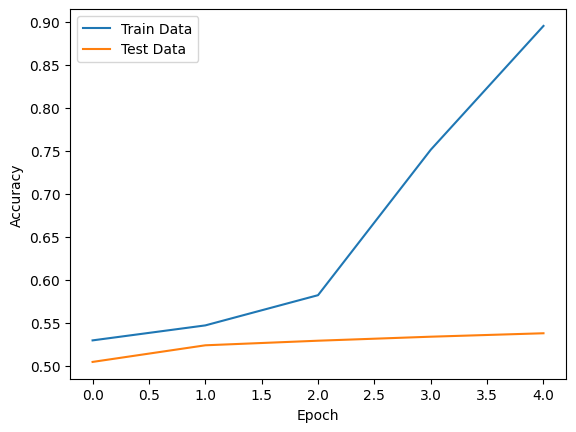

In [ ]:
plt.plot(lstm_history.history['accuracy'], label='Train Data')
plt.plot(lstm_history.history['val_accuracy'], label='Test Data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()